# Practicing Neural Networks with fashion MNIST


### Loading the fashion MNIST data 
The data can be found directly in the package keras (`keras.datasets.fashion_mnist`).

```python
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255
# labels: array of integers: 0 to 9 => class of clothings
# Training set: 60,000 images, Testing set: 10,000 images

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

### With validation

In [99]:
mnist_data,  mnist_info = tfds.load(name='fashion_mnist',with_info=True,as_supervised = True)
mnist_train, mnist_test = mnist_data['train'],mnist_data['test']

num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

def scale(image, label):
    image = tf.cast(image,tf.float32)
    image /= 255.
    return image, label

scaled_train_and_validation_data = mnist_train.map(scale)
test_data = mnist_test.map(scale)

buffer_size= 10000

shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(buffer_size)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)

train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

# too high (max ~ 32)
batch_size = 100

train_data = train_data.batch(batch_size)

# for bossting accruaacy
validation_data = validation_data.batch(num_validation_samples)

test_data = test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

In [102]:
# 5 layers, batch = 12~16, 10000 epochs, hidden layer size 2000
# minutes at most
input_size = 784
output_size = 10
hidden_layer_size = 50
num_epoch = 10

# Feed forward network
model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28,28,1)),
                            tf.keras.layers.Dense(hidden_layer_size,activation= 'relu'),
                            tf.keras.layers.Dense(hidden_layer_size,activation= 'relu'),
                            tf.keras.layers.Dense(hidden_layer_size,activation= 'relu'),
                            tf.keras.layers.Dense(hidden_layer_size,activation= 'relu'),
                            tf.keras.layers.Dense(output_size,activation= 'softmax'),
                            ])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

model.fit(train_data, epochs=num_epoch, validation_data=(validation_inputs,validation_targets),validation_steps=1,verbose=2)

Epoch 1/10
540/540 - 3s - loss: 0.6192 - accuracy: 0.7799 - val_loss: 0.4416 - val_accuracy: 0.8418
Epoch 2/10
540/540 - 3s - loss: 0.4164 - accuracy: 0.8528 - val_loss: 0.3624 - val_accuracy: 0.8675
Epoch 3/10
540/540 - 3s - loss: 0.3672 - accuracy: 0.8683 - val_loss: 0.3480 - val_accuracy: 0.8707
Epoch 4/10
540/540 - 3s - loss: 0.3486 - accuracy: 0.8730 - val_loss: 0.3266 - val_accuracy: 0.8773
Epoch 5/10
540/540 - 3s - loss: 0.3268 - accuracy: 0.8806 - val_loss: 0.3365 - val_accuracy: 0.8718
Epoch 6/10
540/540 - 3s - loss: 0.3136 - accuracy: 0.8852 - val_loss: 0.3245 - val_accuracy: 0.8765
Epoch 7/10
540/540 - 3s - loss: 0.3018 - accuracy: 0.8886 - val_loss: 0.3015 - val_accuracy: 0.8865
Epoch 8/10
540/540 - 3s - loss: 0.2923 - accuracy: 0.8918 - val_loss: 0.3149 - val_accuracy: 0.8850
Epoch 9/10
540/540 - 3s - loss: 0.2836 - accuracy: 0.8948 - val_loss: 0.2764 - val_accuracy: 0.9020
Epoch 10/10
540/540 - 3s - loss: 0.2723 - accuracy: 0.8985 - val_loss: 0.2989 - val_accuracy: 0.8903

In [103]:
test_loss, test_accuracy = model.evaluate(test_data)

1/1 [==============================] - 0s 1ms/step - loss: 0.3669 - accuracy: 0.8715


In [104]:
# loss means uncertainty of the model
# accuracy
print('test loss:' , test_loss,'\ntest_accuracy:', test_accuracy)

test loss: 0.3669479489326477 
test_accuracy: 0.8715000152587891


### Data Exploration

- explore the pictures and labels
- normalize the data to be between 0 and 1. Think about **why** we do this?

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [145]:
labs = {0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

<Figure size 432x288 with 0 Axes>

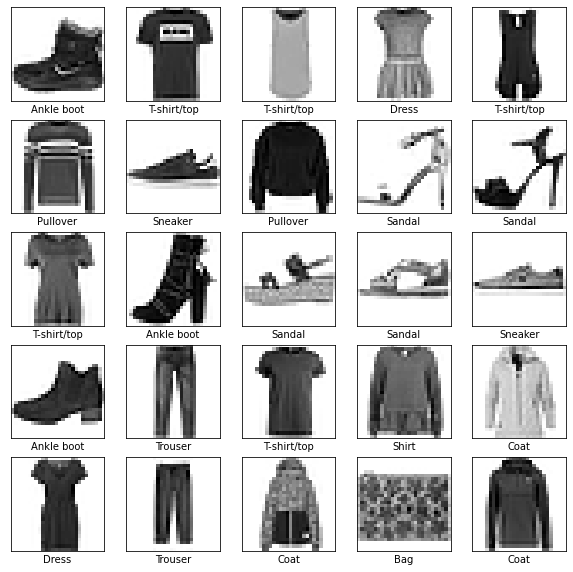

In [146]:
fig1 = plt.figure()
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(labs[train_labels[i]])

In [147]:
train_images = train_images/255
test_images = test_images/255

### Training NN model 

Step 1 - Build the architecture

Step 2 - Compile the model 

Step 3 - Train the model

Step 4 - Evaluate the model 

In [7]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images/255
test_images = test_images/255

output_size = 10
hidden_layer_size = 500

network = models.Sequential([
                            layers.Flatten(input_shape=(28,28,1)),
                            layers.Dense(hidden_layer_size,activation ='relu'),
                            layers.Dense(hidden_layer_size,activation ='relu'),
                            layers.Dense(hidden_layer_size,activation ='relu'),
                            layers.Dense(hidden_layer_size,activation ='relu'),
                            layers.Dense(10,activation ='softmax')
                            ])

opt = tf.keras.optimizers.Adam(learning_rate=0.1)

In [8]:
train_images = train_images/255
test_images = test_images/255

### 1)

In [12]:
output_size = 10
hidden_layer_size = 10

In [13]:
# 5 layers, batch = 12~16, 10000 epochs, hidden layer size 2000
network = models.Sequential([
                            layers.Flatten(input_shape=(28,28,1)),
                            layers.Dense(hidden_layer_size,activation ='relu'),
                            layers.Dense(hidden_layer_size,activation ='relu'),
                            layers.Dense(hidden_layer_size,activation ='relu'),
                            layers.Dense(hidden_layer_size,activation ='relu'),
                            layers.Dense(10,activation ='softmax')
                            ])

opt = tf.keras.optimizers.Adam(learning_rate=0.1)

In [17]:
train_labels.shape

(60000,)

In [16]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### 2)

In [14]:
network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

network.fit(train_images, train_labels, epochs=10, batch_size=16)

Epoch 1/10
3750/3750 [==============================] - 2s 592us/step - loss: 1.2434 - accuracy: 0.4797
Epoch 2/10
3750/3750 [==============================] - 2s 574us/step - loss: 0.8929 - accuracy: 0.6475
Epoch 3/10
3750/3750 [==============================] - 2s 585us/step - loss: 0.8028 - accuracy: 0.6980
Epoch 4/10
3750/3750 [==============================] - 2s 574us/step - loss: 0.7476 - accuracy: 0.7224
Epoch 5/10
3750/3750 [==============================] - 2s 573us/step - loss: 0.7115 - accuracy: 0.7400
Epoch 6/10
3750/3750 [==============================] - 2s 572us/step - loss: 0.6892 - accuracy: 0.7479
Epoch 7/10
3750/3750 [==============================] - 2s 597us/step - loss: 0.6726 - accuracy: 0.7558
Epoch 8/10
3750/3750 [==============================] - 2s 609us/step - loss: 0.6591 - accuracy: 0.7599
Epoch 9/10
3750/3750 [==============================] - 2s 589us/step - loss: 0.6478 - accuracy: 0.7629
Epoch 10/10
3750/3750 [==============================] - 2s 583u

### 3)

In [169]:
# each Epoch takes 16 (batch size) samples from total samples and runs forward AND backward propagation each iteration
# 
network.fit(train_images, train_labels, epochs=10, batch_size=16)

Epoch 1/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.5094 - accuracy: 0.8179
Epoch 2/10
3750/3750 [==============================] - 16s 4ms/step - loss: 0.3897 - accuracy: 0.8584
Epoch 3/10
3750/3750 [==============================] - 15s 4ms/step - loss: 0.3515 - accuracy: 0.8728
Epoch 4/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.3293 - accuracy: 0.8812
Epoch 5/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.3133 - accuracy: 0.8867
Epoch 6/10
3750/3750 [==============================] - 16s 4ms/step - loss: 0.2990 - accuracy: 0.8905
Epoch 7/10
3750/3750 [==============================] - 15s 4ms/step - loss: 0.2854 - accuracy: 0.8958
Epoch 8/10
3750/3750 [==============================] - 15s 4ms/step - loss: 0.2811 - accuracy: 0.8983
Epoch 9/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.2682 - accuracy: 0.9018
Epoch 10/10
3750/3750 [==============================] - 15s 4ms/step - l

In [161]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc, 'test_loss', test_loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.3535 - accuracy: 0.8769
test_acc: 0.8769000172615051 test_loss 0.3534516394138336


In [162]:
predictions = network.predict(test_images)

<Figure size 432x288 with 0 Axes>

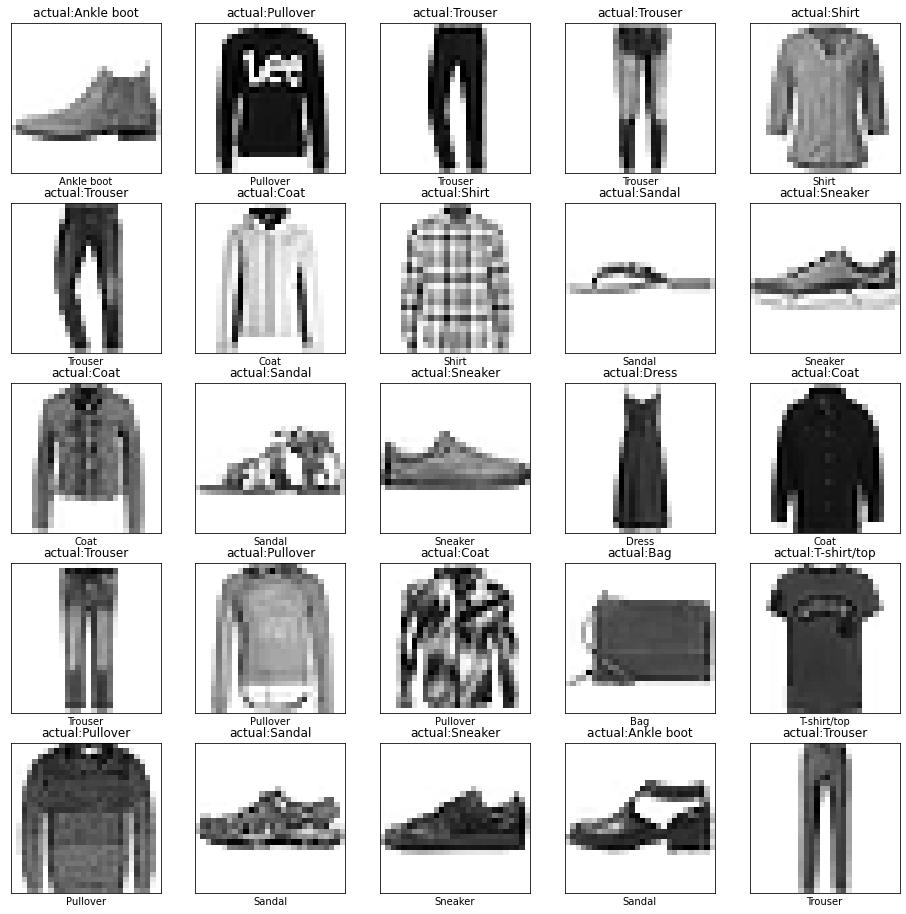

In [172]:
fig1 = plt.figure()
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.title(f'actual:{labs[test_labels[i]]}')
    plt.xlabel(labs[np.argmax(predictions[i])])

In [173]:
num_rows, 2*num_cols, 2*0+1

(5, 6, 1)

### saving model

In [73]:
network.save('fasion.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: fasion.model/assets


In [75]:
new_network=models.load_model('fasion.model')

In [77]:
preds = new_network.predict(test_images)

In [85]:
labs[np.argmax(preds[0])]

'Ankle boot'